# Lending Club Case Study

Data Source: <br>
Data is from a company which is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. <br>
Borrowers can easily access lower interest rate loans through a fast online interface

Purpose: 
Identification of the "Defaulters" who will be the cause for the credit loss for the company is the aim of this analysis. <br>
Also, derive some useful insights out of the analysis.

## Importing the libraries

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding

In [98]:
# Read the data into a dataframe from the csv file
loan_df = pd.read_csv("loan.csv", low_memory=False)

# Check the shape to the data
loan_df.shape

(39717, 111)

This gives a high level understanding that the data contains details of 39717 loan applicants with 111 different details of each applicant

In [150]:
# Get information about the data types and null values of all columns using info() command 
loan_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   term                 38577 non-null  object 
 2   int_rate             38577 non-null  float64
 3   installment          38577 non-null  float64
 4   grade                38577 non-null  object 
 5   emp_length           38577 non-null  object 
 6   home_ownership       38577 non-null  object 
 7   verification_status  38577 non-null  object 
 8   issue_d              38577 non-null  object 
 9   loan_status          38577 non-null  object 
 10  purpose              38577 non-null  object 
 11  addr_state           38577 non-null  object 
 12  dti                  38577 non-null  float64
 13  delinq_2yrs          38577 non-null  int64  
 14  earliest_cr_line     38577 non-null  object 
 15  inq_last_6mths       38577 non-null 

We can observe that the data has many columns which have only null values

## Data Cleaning

###### Drop the columns which might not be useful for analysis

In [100]:
# Drop the columns which have null values in all the rows
loan_df.dropna(axis=1, how="all", inplace=True)
loan_df.shape

(39717, 57)

57 columns are remaining after removing the columns with null values

In [101]:
# Verify the unique values in each column
loan_df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

ID column has unique values indicates that there are no duplicate records. <br> 
Also there are some columns which have the same value for all the rows

In [102]:
# Drop the irrelevant columns  and columns which might not be much useful for analysis

# Drop the columns with same value in all rows as it won't be useful for analysis
loan_df.drop(columns=loan_df.columns[loan_df.nunique()==1], inplace=True)

# Drop the columns which have more than 50% null values
loan_df.drop (columns=["mths_since_last_delinq","mths_since_last_record","next_pymnt_d"], inplace=True)

In [103]:
# Drop the columns like id, member_id, url, desc, title, emp_title which are mostly unique and specific to an applicant
# zip_code which might not be much useful
# annual_inc can be removed as dti has more useful information regarding the income
loan_df.drop(columns=["id", "member_id", "url", "desc", "title", "emp_title", "zip_code", "annual_inc"], inplace=True)

In [104]:
# Drop the columns which might be redundant
# "pub_rec" and "pub_rec_bankruptcies" are closely related
# "total_acc" and "open_acc" can be removed as the volume of credit taken by the applicants is more useful for analysis
#  than the number of credit lines
# "revol_bal" can be removed as "revol_util" can be more useful
# "grade" and "sub_grade" are closely related. Removing sub_grade as analysis can be done with grade
loan_df.drop(columns=["pub_rec_bankruptcies","total_acc", "open_acc","revol_bal", "sub_grade"], inplace=True)

In [105]:
# Drop the columns which might not have the info when a loan application is received like funded_amnt,
# funded_amnt_inv, out_prncp,out_prncp_inv,total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, 
# total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d
loan_df.drop(columns=["funded_amnt", "funded_amnt_inv", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"], inplace=True)

#Check the remaining information in the data
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   term                 39717 non-null  object 
 2   int_rate             39717 non-null  object 
 3   installment          39717 non-null  float64
 4   grade                39717 non-null  object 
 5   emp_length           38642 non-null  object 
 6   home_ownership       39717 non-null  object 
 7   verification_status  39717 non-null  object 
 8   issue_d              39717 non-null  object 
 9   loan_status          39717 non-null  object 
 10  purpose              39717 non-null  object 
 11  addr_state           39717 non-null  object 
 12  dti                  39717 non-null  float64
 13  delinq_2yrs          39717 non-null  int64  
 14  earliest_cr_line     39717 non-null  object 
 15  inq_last_6mths       39717 non-null 

###### Drop the rows which are not useful for analysis

In [106]:
# Remove the rows with loan_status as "Current" as it would be difficult to predict if they are likely to default or not
loan_df=loan_df[loan_df["loan_status"]!="Current"]

#Check the shape of the data
loan_df.shape

(38577, 18)

###### Handling Missing Values

In [107]:
# Check for columns which have null values
loan_df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length             1033
home_ownership            0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
delinq_2yrs               0
earliest_cr_line          0
inq_last_6mths            0
pub_rec                   0
revol_util               50
dtype: int64

###### Imputing missing values

We have 2.6% of missing values in emp_length column. <br>
As it is a categorical variable, we can replace the null values with mode value.

In [108]:
# Impute the missing values with mode as it is a categorical variable
loan_df["emp_length"]=loan_df["emp_length"].fillna(loan_df["emp_length"].mode()[0])

# Verify that there are no null values in "emp_length" column
loan_df["emp_length"].isnull().sum()

0

The column "revol_util" will be useful for analysis as a numerical parameter. <br> 
But due to the presence of % symbol, it is treated as a string. <br>
So, we need to change the data type of the "revol_util" column before imputing the null values.

In [109]:
# Correct the data type of revol_util to a float value without changing the null values
loan_df["revol_util"]=loan_df["revol_util"].apply(lambda x : float(x.replace("%","")) if pd.notnull(x) else x)

# Observe the mean and median of the data in "revol_util" column
loan_df["revol_util"].describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

We have 0.1% of null values in "revol_util" column and output of describe command shows that mean and median are almost close to each other.<br>
So we can use either of them to impute the null values as it is a numerical value

In [155]:
# Fill the null values with median value
loan_df["revol_util"].fillna(loan_df["revol_util"].median())

# Verify that there are no null values in "revol_util" column
print("Null values in revol_util column is '%s'"%(loan_df["revol_util"].isnull().sum()))

#Verify that the data type of revol_util column is float
print("Data type of Revolving line utilization rate column is '%s'"%(loan_df.revol_util.dtype))

Null values in revol_util column is '50'
Data type of Revolving line utilization rate column is 'float64'


###### Standardizing the values

Interest rate should also be a numerical value. <br>
So correct the data type of int_rate to a numerical value

In [111]:
# Standardize the values in interest column
loan_df["int_rate"]=loan_df["int_rate"].apply(lambda x : float(x.replace("%","")))

# Verify that the data type of revol_util column is float
print("Data type of interest rate column is '%s'"%(loan_df.int_rate.dtype))

Data type of interest rate column is 'float64'


###### Derived Columns

In [112]:
# Extract the year and month from the loan issued date column (issue_d)
loan_df["Year"]=loan_df["issue_d"].apply(lambda x: int(x.split('-')[1]) + 2000)
loan_df["Month"]=loan_df["issue_d"].apply(lambda x: x.split('-')[0])

In [113]:
# Verify that the Month and Year column are added
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,pub_rec,revol_util,Year,Month
0,5000,36 months,10.65,162.87,B,10+ years,RENT,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,0,83.7,2011,Dec
1,2500,60 months,15.27,59.83,C,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,0,9.4,2011,Dec
2,2400,36 months,15.96,84.33,C,10+ years,RENT,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,0,98.5,2011,Dec
3,10000,36 months,13.49,339.31,C,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,0,21.0,2011,Dec
5,5000,36 months,7.90,156.46,A,3 years,RENT,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,0,28.3,2011,Dec


###### Outlier Treatment

<AxesSubplot:>

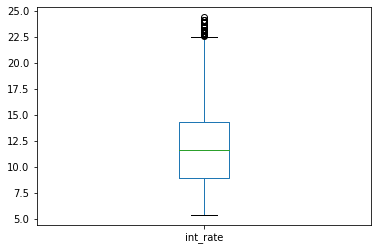

In [114]:
#Check if there are any outliers in interest rate column (int_rate) using box plot
loan_df.int_rate.plot.box()

We find that there are some outliers. Lets find the number of outliers

In [115]:
# Check the records with int_rate greater than 22.5
(loan_df[loan_df["int_rate"]> 22.5]).shape

(65, 20)

As we have only 0.1% outliers, capping the values to the maximum value in the range - 22.5 

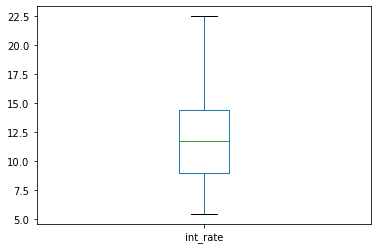

In [153]:
# Cap the values of outliers to the maximum value
loan_df["int_rate"]=loan_df["int_rate"].apply(lambda x : x if x <= 22.5 else 22.5)

# Check for the outliers again using box plot
loan_df.int_rate.plot.box()
plt.show()

Outliers in the interest rate column are removed. <br>
We can observe that the variation of interest rate for the sanctioned loans is approximately between 9% to 14%

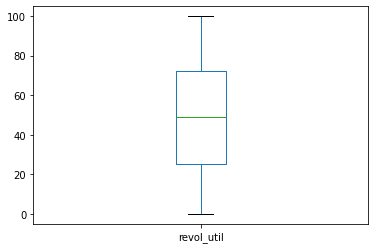

In [154]:
# Check for outliers in revol_util column using a box plot
loan_df.revol_util.plot.box()
plt.show()

There are no outliers in revol_util column. <br> 
Observed that most of the applicants are utlising the revolving credit between 30% and 70% of their available credit limit

### Univariate Analysis

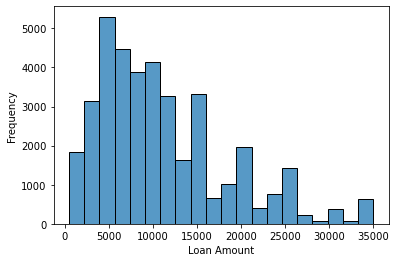

In [118]:
# Observe the distribution pattern of loan amount with a histplot
sns.histplot(loan_df["loan_amnt"], bins=20)
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

Most of the applicants have been provided with loan less than 15000, though some of them were offered upto 35000

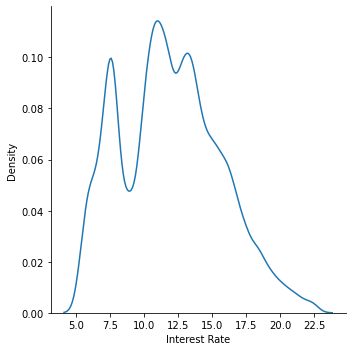

In [119]:
# Observe the distribution pattern of interest rates using displot
sns.displot(loan_df.int_rate, kind="kde")
plt.xlabel("Interest Rate")
plt.show()

There are a few loan applicants who applied for loans with a higher rate of interest.

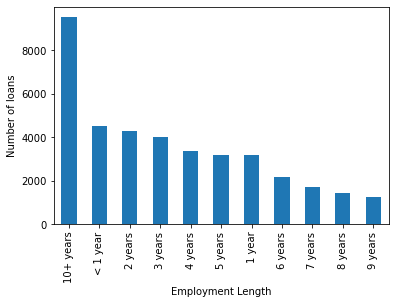

In [120]:
# Observe the pattern of loan applicant's employment length using a bar plot
loan_df.emp_length.value_counts().plot.bar()
plt.xlabel("Employment Length")
plt.ylabel("Number of loans")
plt.show()

Most of the loans were approved for people with more than 10 years of experience

Text(0, 0.5, 'Purpose of Loan')

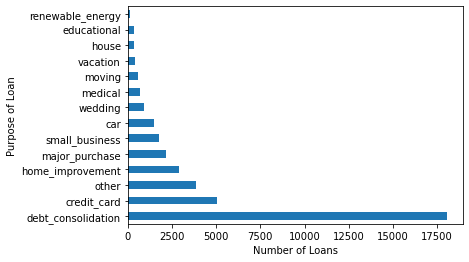

In [121]:
# Observe the distribution pattern of the purpose of loan using a horizontal bar plot
loan_df.purpose.value_counts().plot.barh()
plt.xlabel("Number of Loans")
plt.ylabel("Purpose of Loan")

Most of the loans were taken by the applicants for debt consolidation 

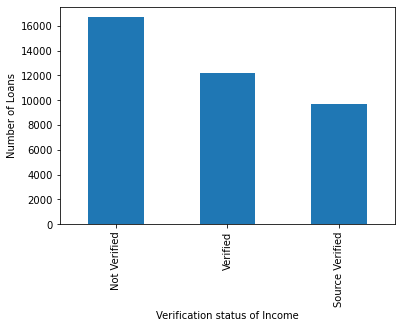

In [122]:
# Plot verification status using bar plot
loan_df.verification_status.value_counts().plot.bar()
plt.xlabel("Verification status of Income")
plt.ylabel("Number of Loans")
plt.show()

According to the plot, income was not verified for a considerable number of applicants

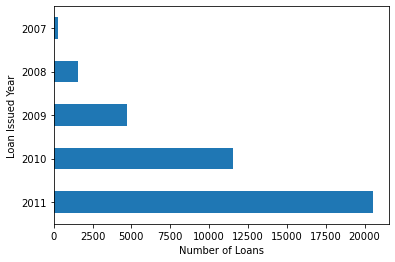

In [123]:
# Plot the distribution of loans over different years
loan_df["Year"].value_counts().plot.barh()
plt.xlabel("Number of Loans")
plt.ylabel("Loan Issued Year")
plt.show()

The data contains information about the loans sanctioned between the years 2007 to 2011. <br> 
The number of loans offered to the applicants in every  year is more than 2 times of the loans offered in its previous year.

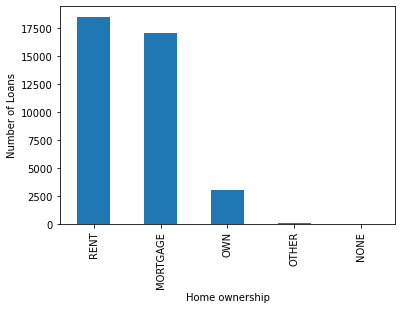

In [124]:
#Plot home_ownership using bar plot
loan_df["home_ownership"].value_counts().plot.bar()
plt.xlabel("Home ownership")
plt.ylabel("Number of Loans")
plt.show()

Most of the applicants stay in a rented house or a mortgaged house

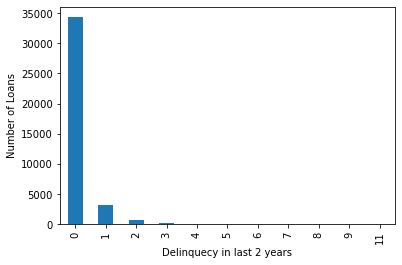

In [125]:
# Observe the pattern delinquecy in the last 2 years
loan_df.delinq_2yrs.value_counts().plot.bar()
plt.xlabel("Delinquecy in last 2 years")
plt.ylabel("Number of Loans")
plt.show()

Almost 90% of the applicants didnot miss the loan/credit installments in the past 2 years. <br>
Only 10% of the applicants have delinquecy incidents

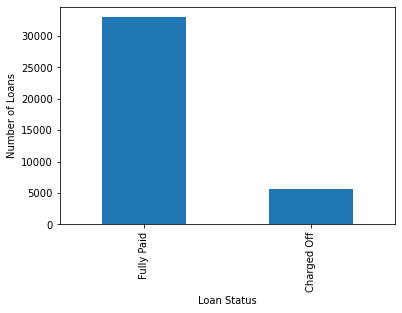

In [126]:
# Observe the pattern of defaulters
loan_df.loan_status.value_counts().plot.bar()
plt.xlabel("Loan Status")
plt.ylabel("Number of Loans")
plt.show()

Out of the total loans sanctioned, about 15% of the loans were defaulted.

### Segmented Univariate Analysis

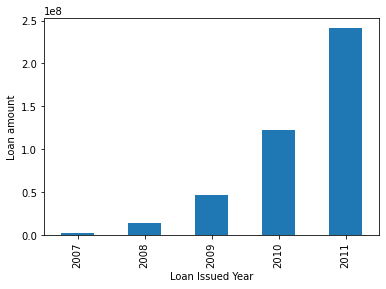

In [127]:
# Observe the amount of loans taken in different years
loan_df.groupby("Year")["loan_amnt"].sum().plot.bar()
plt.xlabel("Loan Issued Year")
plt.ylabel("Loan amount")
plt.show()

Amount of loan approved for the applicants is more than doubled year after year. <br> 
Plot shows the loan amount in multiples of 10 raised to power of 8

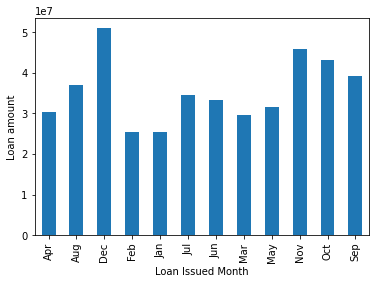

In [128]:
# Plot the amount of loans sanctioned in different months
loan_df.groupby("Month")["loan_amnt"].sum().plot.bar()
plt.xlabel("Loan Issued Month")
plt.ylabel("Loan amount")
plt.show()

Highest loan amount is sanctioned in December and the least in February and January

### Bivariant Analysis

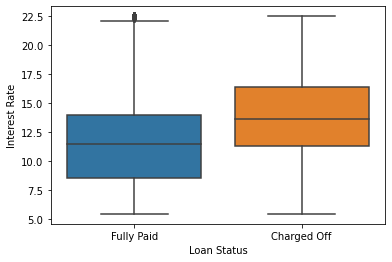

In [138]:
# Observe the impact of interest rate on loan status
sns.boxplot(x=loan_df["loan_status"], y=loan_df["int_rate"])
plt.xlabel("Loan Status")
plt.ylabel("Interest Rate")
plt.show()

Observation says that loan applicants with higher interest rates are more likely to default the loan payments

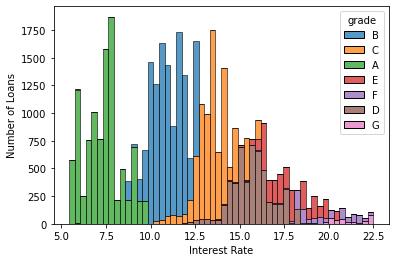

In [130]:
# Observe the distribution of Interest rate according to the grade
sns.histplot(x="int_rate", hue="grade",data=loan_df, stat="count", multiple="stack")
plt.xlabel("Interest Rate")
plt.ylabel("Number of Loans")
plt.show()

The rate of interest at which the loan was offered has increased from loan grade A to loan grade G. <br> 
Number of loans issues to grades E,F and G is very less compared to the other grades

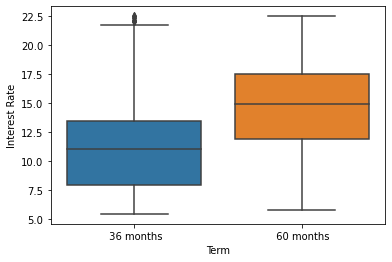

In [131]:
#Observe the relation between loan term and the interest rate
sns.boxplot(x="term", y="int_rate", data= loan_df)
plt.xlabel("Term")
plt.ylabel("Interest Rate")
plt.show()

Long term loans are sanctioned at higher interest rates

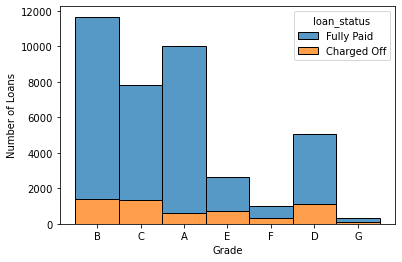

In [132]:
# Observe the distribution of defaulters based on the grade
sns.histplot(x="grade", hue="loan_status",data=loan_df, stat="count", multiple="stack")
plt.xlabel("Grade")
plt.ylabel("Number of Loans")
plt.show()

Grade of the loan does not seem to strongly determine the defaulters of the loan

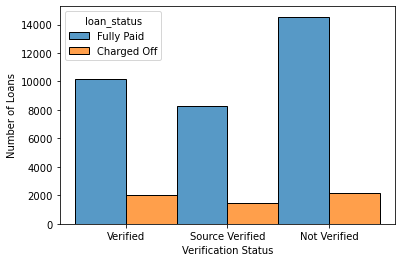

In [133]:
# Observe the dependency of verification status on defaulters
sns.histplot(x="verification_status", hue="loan_status",data=loan_df, stat="count", multiple="dodge")
plt.xlabel("Verification Status")
plt.ylabel("Number of Loans")
plt.show()

Loan have been defaulted by applicants whose Income or Income source is verified also

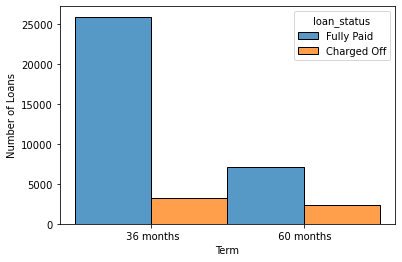

In [134]:
# Observe the impact of long term loans on the defaulters
sns.histplot(x="term", hue="loan_status",data=loan_df, stat="count", multiple="dodge")
plt.xlabel("Term")
plt.ylabel("Number of Loans")
plt.show()

Percentage of defaulters seems to be high for long term loans

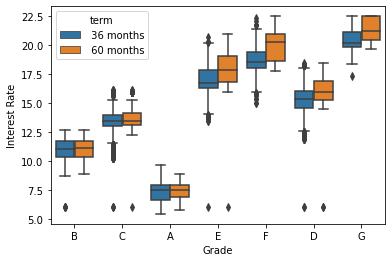

In [135]:
# Observe the pattern of loan term based on interest rate and grade
sns.boxplot(y= "int_rate", x="grade", data=loan_df, hue="term")
plt.xlabel("Grade")
plt.ylabel("Interest Rate")
plt.show()

Interest rates of loans are in increasing order for grades A to G. <br> 
Most of the loans sanctioned for the grades D, E, F and G are long term high interest loans

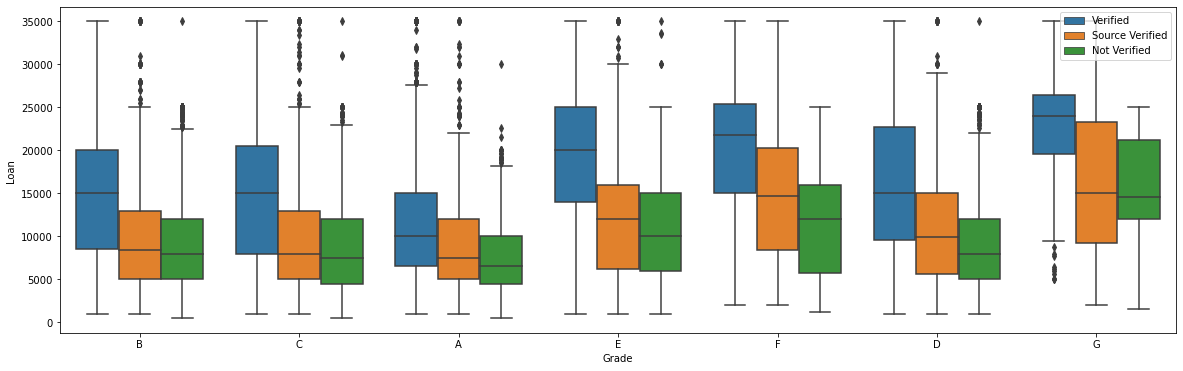

In [149]:
# Observe the impact of verifiction status
plt.figure(figsize=[20,6])
g=sns.boxplot(x="grade", y="loan_amnt", data= loan_df, hue="verification_status")
plt.xlabel("Grade")
plt.ylabel("Loan ")
g.legend(loc='upper right')
plt.show()

Loan amount sanctioned to the applicants whose income is not verified is low compared to the other applicants. <br>
For applicants whose income is not verified, more amount is sanctioned for grade G. <br>
According to the previous observations, we can conclude that higher amount is sanctioned for grade G at higher interest rates even when income of loan applicants is not verified

### Multi Variate Analysis

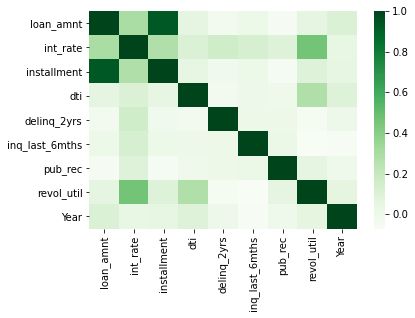

In [137]:
# Observe the correlation between all the parameters in the data
sns.heatmap(loan_df.corr(), cmap= "Greens")
plt.show()

## Summary of insights from the analysis

- Loan with higher interest rate have a higher tendency to default the loans.
- Prominent purpose of the loan is Debt Consolidation.
- Most of the long term loans are sanctioned at a higher interest rate.
- Most of the loans sanctioned for grades E, F and G are at higher interest rates.
- When income source is not verified, company is likely to sanction loans with lower amount or more amount at higher interest rate.
- Data is collected from the years 2007 to 2011.
- Every year, the number of loans and the total amount sanctioned for all the loans together is more than 2 times of its previous year.